### RiverCast

## Importing Libraries

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

## Analyzing Dataset

In [40]:
# import dataset
df = pd.read_csv('dataset.csv')
df = df.ffill(axis=0) # fill NaN
df.head(10)

,Station,Year,Month,Day,Hour,Waterlevel,Station.1,Year.1,Month.1,Day.1,...,RF-Intensity.1,Humidity,Precipitation,Temperature,Temperature.1,Humidity.1,Precipitation.1,Temperature.2,Humidity.2,Precipitation.2
0,NANGKA,2012,January,1,1,15.86,STO.NINO,2012,January,1,...,0.0,18.01,0.01,24.69,24.69,18.01,0.01,24.69,18.01,0.01
1,NANGKA,2012,January,1,2,15.86,STO.NINO,2012,January,1,...,0.0,18.01,0.01,24.69,24.69,18.01,0.01,24.69,18.01,0.01
2,NANGKA,2012,January,1,3,15.86,STO.NINO,2012,January,1,...,0.0,18.01,0.01,24.69,24.69,18.01,0.01,24.69,18.01,0.01
3,NANGKA,2012,January,1,4,15.86,STO.NINO,2012,January,1,...,0.0,18.01,0.01,24.69,24.69,18.01,0.01,24.69,18.01,0.01
4,NANGKA,2012,January,1,5,15.86,STO.NINO,2012,January,1,...,0.0,18.01,0.01,24.69,24.69,18.01,0.01,24.69,18.01,0.01
5,NANGKA,2012,January,1,6,15.86,STO.NINO,2012,January,1,...,0.0,18.01,0.01,24.69,24.69,18.01,0.01,24.69,18.01,0.01
6,NANGKA,2012,January,1,7,15.86,STO.NINO,2012,January,1,...,0.0,18.01,0.01,24.69,24.69,18.01,0.01,24.69,18.01,0.01
7,NANGKA,2012,January,1,8,15.86,STO.NINO,2012,January,1,...,0.0,18.01,0.01,24.69,24.69,18.01,0.01,24.69,18.01,0.01
8,NANGKA,2012,January,1,9,15.86,STO.NINO,2012,January,1,...,0.0,17.64,0.01,26.20,26.20,17.64,0.01,26.20,17.64,0.01
9,NANGKA,2012,January,1,10,15.86,STO.NINO,2012,January,1,...,0.0,17.27,0.02,27.55,27.55,17.27,0.02,27.55,17.27,0.02


In [41]:
# remove non numeric fields
df = df[['Waterlevel', 'Waterlevel.1', 'Waterlevel.2', 'RF-Intensity', 'RF-Intensity.1', 'Temperature', 'Temperature.1',  'Temperature.2', 'Humidity', 'Humidity.1', 'Humidity.2', 'Precipitation', 'Precipitation.1', 'Precipitation.2']]
df = df.astype(np.float64)
df.head(10)

,Waterlevel,Waterlevel.1,Waterlevel.2,RF-Intensity,RF-Intensity.1,Temperature,Temperature.1,Temperature.2,Humidity,Humidity.1,Humidity.2,Precipitation,Precipitation.1,Precipitation.2
0,15.86,12.53,21.97,0.0,0.0,24.69,24.69,24.69,18.01,18.01,18.01,0.01,0.01,0.01
1,15.86,12.53,21.97,0.0,0.0,24.69,24.69,24.69,18.01,18.01,18.01,0.01,0.01,0.01
2,15.86,12.53,21.97,0.0,0.0,24.69,24.69,24.69,18.01,18.01,18.01,0.01,0.01,0.01
3,15.86,12.53,21.97,0.0,0.0,24.69,24.69,24.69,18.01,18.01,18.01,0.01,0.01,0.01
4,15.86,12.53,21.97,0.0,0.0,24.69,24.69,24.69,18.01,18.01,18.01,0.01,0.01,0.01
5,15.86,12.53,21.97,0.0,0.0,24.69,24.69,24.69,18.01,18.01,18.01,0.01,0.01,0.01
6,15.86,12.53,21.97,0.0,0.0,24.69,24.69,24.69,18.01,18.01,18.01,0.01,0.01,0.01
7,15.86,12.53,21.97,0.0,0.0,24.69,24.69,24.69,18.01,18.01,18.01,0.01,0.01,0.01
8,15.86,12.53,21.97,0.0,0.0,26.20,26.20,26.20,17.64,17.64,17.64,0.01,0.01,0.01
9,15.86,12.53,21.97,0.0,0.0,27.55,27.55,27.55,17.27,17.27,17.27,0.02,0.02,0.02


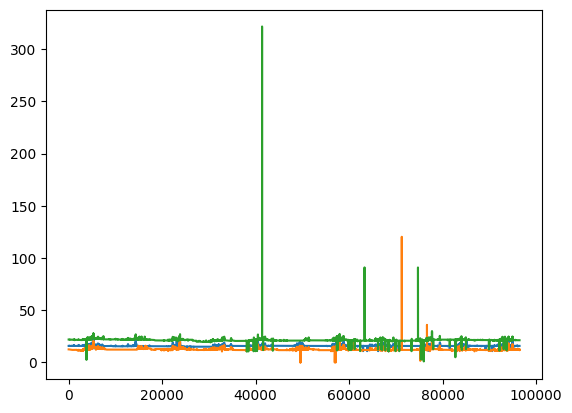

In [42]:
# visualize water levels
water_levels = df[['Waterlevel', 'Waterlevel.1', 'Waterlevel.2']]
plt.plot(water_levels)

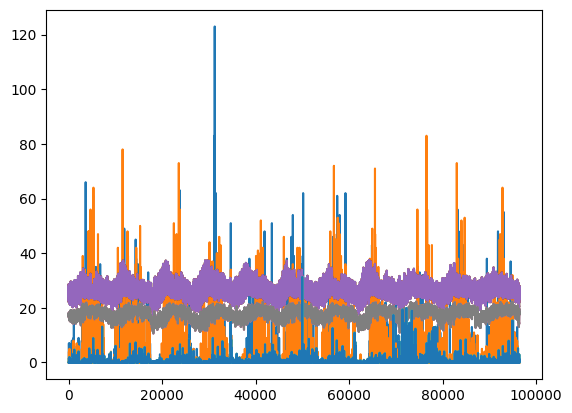

In [43]:
# visualize weather
weather = df[['RF-Intensity', 'RF-Intensity.1', 'Temperature', 'Temperature.1',  'Temperature.2', 'Humidity', 'Humidity.1', 'Humidity.2', 'Precipitation', 'Precipitation.1', 'Precipitation.2']]
plt.plot(weather)

## Clean Dataset

# Remove Outliers

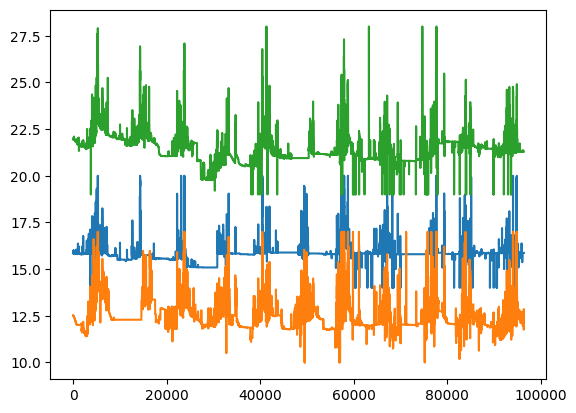

In [44]:
df['Waterlevel'] = df['Waterlevel'].clip(upper=20, lower=14, axis=0)
df['Waterlevel.1'] = df['Waterlevel.1'].clip(upper=17, lower=10, axis=0)
df['Waterlevel.2'] = df['Waterlevel.2'].clip(upper=28, lower=19, axis=0)

water_levels = df[['Waterlevel', 'Waterlevel.1', 'Waterlevel.2']]
plt.plot(water_levels)

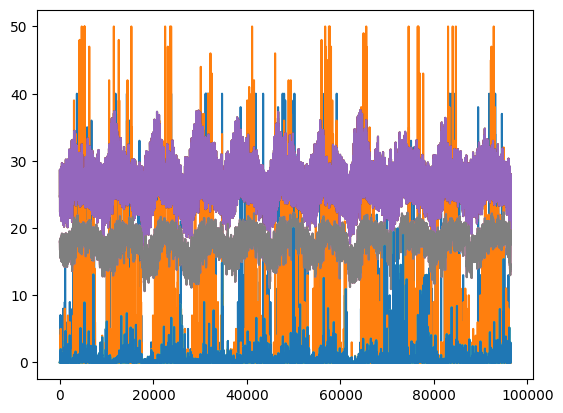

In [45]:
df['RF-Intensity'] = df['RF-Intensity'].clip(upper=40, lower=0, axis=0)
df['RF-Intensity.1'] = df['RF-Intensity.1'].clip(upper=50, lower=0, axis=0)
df[['Precipitation', 'Precipitation.1', 'Precipitation.2']] = df[['Precipitation', 'Precipitation.1', 'Precipitation.2']].clip(upper=20, lower=0, axis=0)

weather = df[['RF-Intensity', 'RF-Intensity.1', 'Temperature', 'Temperature.1',  'Temperature.2', 'Humidity', 'Humidity.1', 'Humidity.2', 'Precipitation', 'Precipitation.1', 'Precipitation.2']]
plt.plot(weather)

# Moving Average to Smoothen Time-Series

In [46]:
df = df.rolling(window=48).mean().fillna(method='bfill').fillna(method='ffill')

C:\Users\Administrator\AppData\Local\Temp\ipykernel_17632\1374650212.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.rolling(window=48).mean().fillna(method='bfill').fillna(method='ffill')


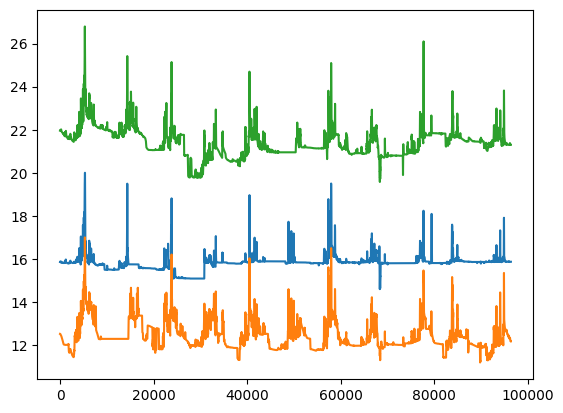

In [47]:
water_levels = df[['Waterlevel', 'Waterlevel.1', 'Waterlevel.2']]
labels = df[['Waterlevel', 'Waterlevel.1', 'Waterlevel.2']].to_numpy()
plt.plot(water_levels)

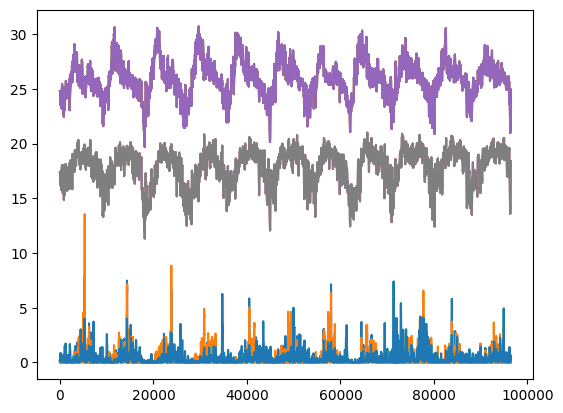

In [48]:
weather = df[['RF-Intensity', 'RF-Intensity.1', 'Temperature', 'Temperature.1', 'Temperature.2', 'Humidity', 'Humidity.1', 'Humidity.2', 'Precipitation', 'Precipitation.1', 'Precipitation.2']]
plt.plot(weather)

## Principal Component Analysis

In [49]:
# standardize the data
scaled_data = (df - df.mean()) / df.std()
scaled_data.head(10)

,Waterlevel,Waterlevel.1,Waterlevel.2,RF-Intensity,RF-Intensity.1,Temperature,Temperature.1,Temperature.2,Humidity,Humidity.1,Humidity.2,Precipitation,Precipitation.1,Precipitation.2
0,0.080484,0.143082,0.839228,-0.448097,-0.346818,-0.714238,-0.714238,-0.714238,-0.329341,-0.329341,-0.329341,-0.456977,-0.456977,-0.456977
1,0.080484,0.143082,0.839228,-0.448097,-0.346818,-0.714238,-0.714238,-0.714238,-0.329341,-0.329341,-0.329341,-0.456977,-0.456977,-0.456977
2,0.080484,0.143082,0.839228,-0.448097,-0.346818,-0.714238,-0.714238,-0.714238,-0.329341,-0.329341,-0.329341,-0.456977,-0.456977,-0.456977
3,0.080484,0.143082,0.839228,-0.448097,-0.346818,-0.714238,-0.714238,-0.714238,-0.329341,-0.329341,-0.329341,-0.456977,-0.456977,-0.456977
4,0.080484,0.143082,0.839228,-0.448097,-0.346818,-0.714238,-0.714238,-0.714238,-0.329341,-0.329341,-0.329341,-0.456977,-0.456977,-0.456977
5,0.080484,0.143082,0.839228,-0.448097,-0.346818,-0.714238,-0.714238,-0.714238,-0.329341,-0.329341,-0.329341,-0.456977,-0.456977,-0.456977
6,0.080484,0.143082,0.839228,-0.448097,-0.346818,-0.714238,-0.714238,-0.714238,-0.329341,-0.329341,-0.329341,-0.456977,-0.456977,-0.456977
7,0.080484,0.143082,0.839228,-0.448097,-0.346818,-0.714238,-0.714238,-0.714238,-0.329341,-0.329341,-0.329341,-0.456977,-0.456977,-0.456977
8,0.080484,0.143082,0.839228,-0.448097,-0.346818,-0.714238,-0.714238,-0.714238,-0.329341,-0.329341,-0.329341,-0.456977,-0.456977,-0.456977
9,0.080484,0.143082,0.839228,-0.448097,-0.346818,-0.714238,-0.714238,-0.714238,-0.329341,-0.329341,-0.329341,-0.456977,-0.456977,-0.456977


# Water Level Data

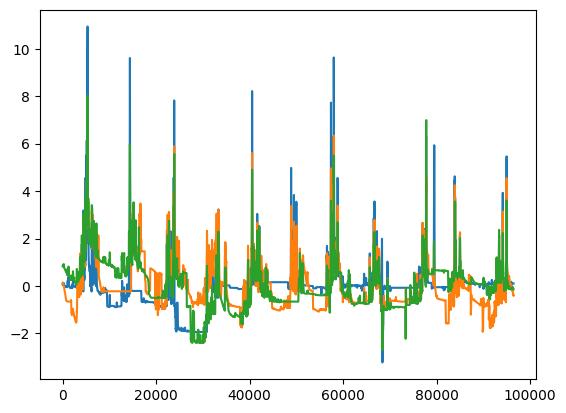

In [50]:
# convert to numpy
water_data = scaled_data[['Waterlevel', 'Waterlevel.1', 'Waterlevel.2']].to_numpy()
plt.plot(water_data)

In [51]:
# compute covariance matrix
water_cov_matrix = np.cov(water_data, ddof = 0, rowvar = False)
water_cov_matrix.shape

(3, 3)

In [52]:
# compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(water_cov_matrix)
order_of_importance = np.argsort(eigenvalues)[::-1] 

sorted_eigenvalues = eigenvalues[order_of_importance]
sorted_eigenvectors = eigenvectors[:,order_of_importance]

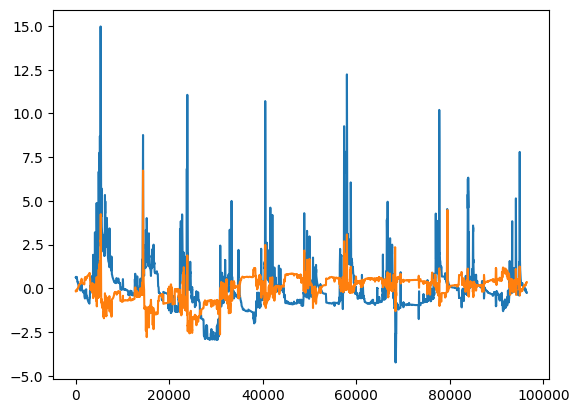

In [53]:
k = 2  # number of features to preserve
reduced_water_data = np.matmul(water_data, sorted_eigenvectors[:,:k]) # transform the original data
plt.plot(reduced_water_data)

# Weather Dataset

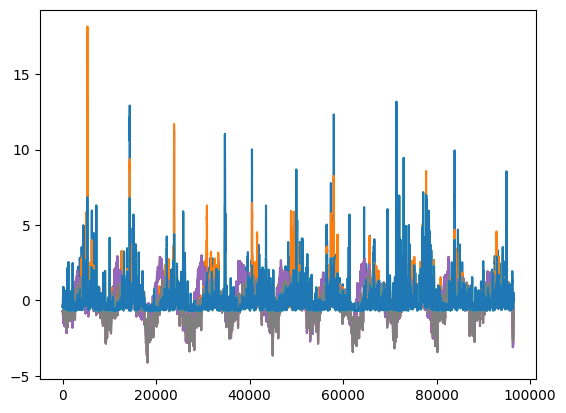

In [54]:
# convert to numpy
weather_data = scaled_data[['RF-Intensity', 'RF-Intensity.1', 'Temperature', 'Temperature.1', 'Temperature.2', 'Humidity', 'Humidity.1', 'Humidity.2', 'Precipitation', 'Precipitation.1', 'Precipitation.2']].to_numpy()
plt.plot(weather_data)

In [55]:
# compute covariance matrix
weather_cov_matrix = np.cov(weather_data, ddof=0, rowvar=False)
weather_cov_matrix.shape

(11, 11)

In [56]:
# compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(weather_cov_matrix)
order_of_importance = np.argsort(eigenvalues)[::-1] 

sorted_eigenvalues = eigenvalues[order_of_importance]
sorted_eigenvectors = eigenvectors[:,order_of_importance]

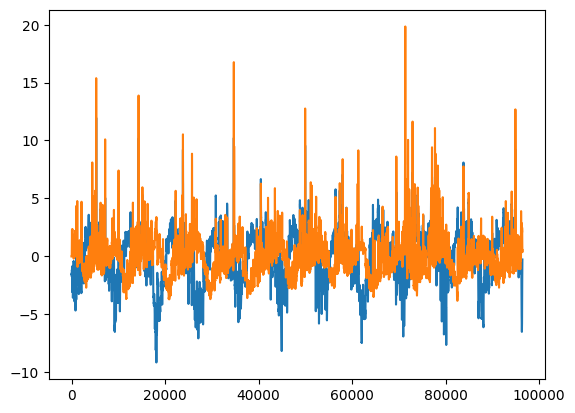

In [57]:
k = 2  # number of features to preserve
reduced_weather_data = np.matmul(weather_data, sorted_eigenvectors[:,:k]) # transform the original data
plt.plot(reduced_weather_data)

## Normalize Dataset

In [58]:
water_scaler = MinMaxScaler()
weather_scaler = MinMaxScaler()
label_scaler = MinMaxScaler()

norm_water = water_scaler.fit_transform(reduced_water_data)
norm_weather = weather_scaler.fit_transform(reduced_weather_data)
y_labels = label_scaler.fit_transform(labels)

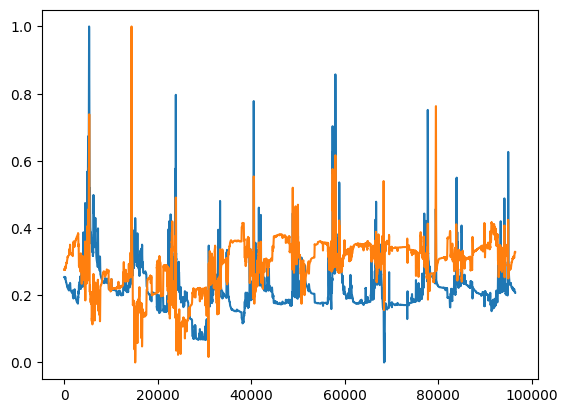

In [59]:
plt.plot(norm_water)

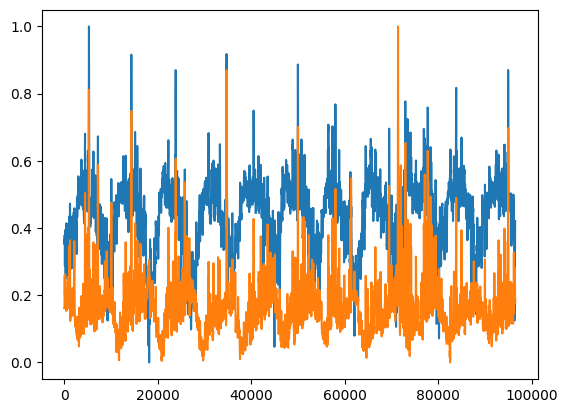

In [60]:
plt.plot(norm_weather)

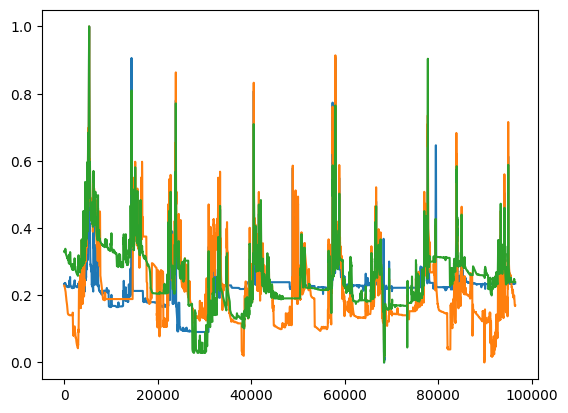

In [61]:
plt.plot(y_labels)

## Split Dataset

In [62]:
# training dataset
X1_train = np.reshape(norm_weather[:67536], (-1, 168, 2))
X2_train = np.reshape(norm_water[:67536], (-1, 168, 2))
Y_train = np.reshape(y_labels[:67536], (-1, 168, 3))

print(X1_train.shape)
print(X2_train.shape)
print(Y_train.shape)

# validation dataset
X1_val = np.reshape(norm_weather[67536:81984], (-1, 168, 2))
X2_val = np.reshape(norm_water[67536:81984], (-1, 168, 2))
Y_val = np.reshape(y_labels[67536:81984], (-1, 168, 3))

print(X1_val.shape)
print(X2_val.shape)
print(Y_val.shape)

# testing dataset
X1_test = np.reshape(norm_weather[81984:], (-1, 168, 2))
X2_test = np.reshape(norm_water[81984:], (-1, 168, 2))
Y_test = np.reshape(y_labels[81984:], (-1, 168, 3))

print(X1_test.shape)
print(X2_test.shape)
print(Y_test.shape)

(402, 168, 2)
(402, 168, 2)
(402, 168, 3)
(86, 168, 2)
(86, 168, 2)
(86, 168, 3)
(86, 168, 2)
(86, 168, 2)
(86, 168, 3)


In [63]:
# arrange batches 
X1_train = np.array([arr[:-1] for arr in X1_train])
X2_train = np.array([arr[:-1] for arr in X2_train])
Y_train = np.array([arr[1:] for arr in Y_train])

print(X1_train.shape)
print(X2_train.shape)
print(Y_train.shape)

X1_val = np.array([arr[:-1] for arr in X1_val])
X2_val = np.array([arr[:-1] for arr in X2_val])
Y_val = np.array([arr[1:] for arr in Y_val])

print(X1_val.shape)
print(X2_val.shape)
print(Y_val.shape)

X1_test = np.array([arr[:-1] for arr in X1_test])
X2_test = np.array([arr[:-1] for arr in X2_test])
Y_test = np.array([arr[1:] for arr in Y_test])

print(X1_test.shape)
print(X2_test.shape)
print(Y_test.shape)

(402, 167, 2)
(402, 167, 2)
(402, 167, 3)
(86, 167, 2)
(86, 167, 2)
(86, 167, 3)
(86, 167, 2)
(86, 167, 2)
(86, 167, 3)


# Build the Model

In [64]:
# Positional Encoding
def positional_encoding(length, depth):
    depth = depth / 2
    positions = np.arange(length)[:, np.newaxis]     # (seq, 1)
    depths = np.arange(depth)[np.newaxis, :]/depth   # (1, depth)

    angle_rates = 1 / (10000**depths)         # (1, depth)
    angle_rads = positions * angle_rates      # (pos, depth)

    pos_encoding = np.concatenate(
        [np.sin(angle_rads), np.cos(angle_rads)],
        axis=-1) 

    return tf.cast(pos_encoding, dtype=tf.float32)


class PositionalEmbedding(tf.keras.layers.Layer):
    def __init__(self, d_model):
        super().__init__()
        self.d_model = d_model
        self.pos_encoding = positional_encoding(length=2048, depth=d_model)

    def call(self, x):
        length = tf.shape(x)[1]
        # This factor sets the relative scale of the positional encoding.
        x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
        x = x + self.pos_encoding[tf.newaxis, :length, :]
        return x

In [65]:
# Attention Layers

class BaseAttention(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super().__init__()
        self.mha = tf.keras.layers.MultiHeadAttention(**kwargs)
        self.layernorm = tf.keras.layers.LayerNormalization()
        self.add = tf.keras.layers.Add()
        
class CrossAttention(BaseAttention):
    def call(self, x, context):
        attn_output, attn_scores = self.mha(
            query=x,
            key=context,
            value=context,
            return_attention_scores=True)

        # Cache the attention scores for plotting later.
        self.last_attn_scores = attn_scores

        x = self.add([x, attn_output])
        x = self.layernorm(x)

        return x
    
class GlobalSelfAttention(BaseAttention):
    def call(self, x):
        attn_output = self.mha(
            query=x,
            value=x,
            key=x)
        x = self.add([x, attn_output])
        x = self.layernorm(x)
        return x
    
class CausalSelfAttention(BaseAttention):
    def call(self, x):
        attn_output = self.mha(
            query=x,
            value=x,
            key=x,
            use_causal_mask = True)
        x = self.add([x, attn_output])
        x = self.layernorm(x)
        return x

In [66]:
class FeedForward(tf.keras.layers.Layer):
    def __init__(self, d_model, dff, dropout_rate=0.1):
        super().__init__()
        self.seq = tf.keras.Sequential([
            tf.keras.layers.Dense(dff, activation='sigmoid'),
            tf.keras.layers.Dense(d_model, 'sigmoid'),
            tf.keras.layers.Dropout(dropout_rate)
        ])
        self.add = tf.keras.layers.Add()
        self.layer_norm = tf.keras.layers.LayerNormalization()

    def call(self, x):
        x = self.add([x, self.seq(x)])
        x = self.layer_norm(x) 
        return x

In [67]:
class EncoderLayer(tf.keras.layers.Layer):
    def __init__(self,*, d_model, dff, dropout_rate=0.1):
        super().__init__()

        self.self_attention = GlobalSelfAttention(
            num_heads=1,
            key_dim=d_model,
            dropout=dropout_rate)

        self.ffn = FeedForward(d_model, dff)

    def call(self, x):
        x = self.self_attention(x)
        x = self.ffn(x)
        return x
    
class Encoder(tf.keras.layers.Layer):
    def __init__(self, *, d_model, dff, dropout_rate=0.1):
        super().__init__()
        self.d_model = d_model
        self.pos_embedding = PositionalEmbedding(d_model=d_model)
        self.enc_layer = EncoderLayer(d_model=d_model, dff=dff, dropout_rate=dropout_rate)
        self.dropout = tf.keras.layers.Dropout(dropout_rate)

    def call(self, x):
        # `x` is token-IDs shape: (batch, seq_len)
        x = self.pos_embedding(x)  # Shape `(batch_size, seq_len, d_model)`.
        # Add dropout.
        x = self.dropout(x)
        x = self.enc_layer(x)
        return x  # Shape `(batch_size, seq_len, d_model)`.

In [68]:
# Decoder Layer

class DecoderLayer(tf.keras.layers.Layer):
    def __init__(self, *, d_model, dff, dropout_rate=0.1):
        super(DecoderLayer, self).__init__()
        self.causal_self_attention = CausalSelfAttention(
            num_heads=1,
            key_dim=d_model,
            dropout=dropout_rate)
        
        self.cross_attention = CrossAttention(
            num_heads=1,
            key_dim=d_model,
            dropout=dropout_rate)
        self.ffn = FeedForward(d_model, dff)

    def call(self, x, context):
        x = self.causal_self_attention(x=x)
        x = self.cross_attention(x=x, context=context)
        self.last_attn_scores = self.cross_attention.last_attn_scores  # Cache the last attention scores for plotting later
        x = self.ffn(x)  
        return x
    
class Decoder(tf.keras.layers.Layer):
    def __init__(self, *, d_model, dff, dropout_rate=0.1):
        super(Decoder, self).__init__()
        self.d_model = d_model
        self.pos_embedding = PositionalEmbedding(d_model=d_model)
        self.dropout = tf.keras.layers.Dropout(dropout_rate)
        self.dec_layer = DecoderLayer(d_model=d_model, dff=dff, dropout_rate=dropout_rate)
        self.last_attn_scores = None

    def call(self, x, context):
        x = self.pos_embedding(x)
        x = self.dropout(x)
        x = self.dec_layer(x, context)
        self.last_attn_scores = self.dec_layer.last_attn_scores

        return x

In [69]:
# Transformer Model

class Transformer(tf.keras.Model):
    def __init__(self, *, d_model, dff, target_output_size, dropout_rate=0.1):
        super().__init__()
        self.encoder = Encoder(d_model=d_model, dff=dff, dropout_rate=dropout_rate)
        self.decoder = Decoder(d_model=d_model, dff=dff, dropout_rate=dropout_rate)
        self.final_layer = tf.keras.layers.Dense(target_output_size, activation='sigmoid')

    def call(self, inputs):
        # To use a Keras model with `.fit` you must pass all your inputs in the
        # first argument.
        context, x  = inputs
        
        context = self.encoder(context)

        x = self.decoder(x, context)  # (batch_size, target_len, d_model)

        # Final linear layer output.
        logits = self.final_layer(x)  # (batch_size, target_len, target_vocab_size)

        try:
            # Drop the keras mask, so it doesn't scale the losses/metrics.
            # b/250038731
            del logits._keras_mask
        except AttributeError:
            pass

        # Return the final output and the attention weights.
        return logits

# Train the Model

In [70]:
transformer = Transformer(d_model=2, dff=512, target_output_size=3)

output = transformer((X1_train, X2_train))
output.shape

TensorShape([402, 167, 3])

In [71]:
transformer.summary()

Model: "transformer_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_1 (Encoder)         multiple                  2594      
                                                                 
 decoder_1 (Decoder)         multiple                  2622      
                                                                 
 dense_9 (Dense)             multiple                  9         
                                                                 
Total params: 5225 (20.41 KB)
Trainable params: 5225 (20.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [72]:
import keras 

transformer.compile(
    loss=keras.losses.MeanSquaredError(),
    optimizer=keras.optimizers.Adam(),
    metrics=[keras.metrics.MeanAbsoluteError()])

transformer.fit(x=(X1_train, X2_train), y=Y_train, batch_size=1, epochs=200, validation_data=((X1_val, X2_val), Y_val))

Epoch 1/200
402/402 [==============================] - 8s 9ms/step - loss: 0.0607 - mean_absolute_error: 0.1845 - val_loss: 0.0109 - val_mean_absolute_error: 0.0908
Epoch 2/200
402/402 [==============================] - 3s 9ms/step - loss: 0.0166 - mean_absolute_error: 0.0901 - val_loss: 0.0075 - val_mean_absolute_error: 0.0690
Epoch 3/200
402/402 [==============================] - 4s 9ms/step - loss: 0.0143 - mean_absolute_error: 0.0816 - val_loss: 0.0069 - val_mean_absolute_error: 0.0638
Epoch 4/200
402/402 [==============================] - 4s 9ms/step - loss: 0.0126 - mean_absolute_error: 0.0777 - val_loss: 0.0064 - val_mean_absolute_error: 0.0604
Epoch 5/200
402/402 [==============================] - 3s 9ms/step - loss: 0.0119 - mean_absolute_error: 0.0760 - val_loss: 0.0069 - val_mean_absolute_error: 0.0625
Epoch 6/200
402/402 [==============================] - 3s 8ms/step - loss: 0.0112 - mean_absolute_error: 0.0736 - val_loss: 0.0082 - val_mean_absolute_error: 0.0686
Epoch 7/20

# Test the Model

In [78]:
# get test data
x1 = X1_test[32:33, :, :][0]
x2 = X1_test[32:33, :, :][0]
y = Y_test[32:33, :, :][0]

x1 = np.reshape(x1, (1, 167, 2))
x2 = np.reshape(x2, (1, 167, 2))

print(x1.shape)
print(x2.shape)

(1, 167, 2)
(1, 167, 2)


In [79]:
y_hat = transformer.predict((x1, x2))
y_hat.shape

1/1 [==============================] - 0s 42ms/step


(1, 167, 3)

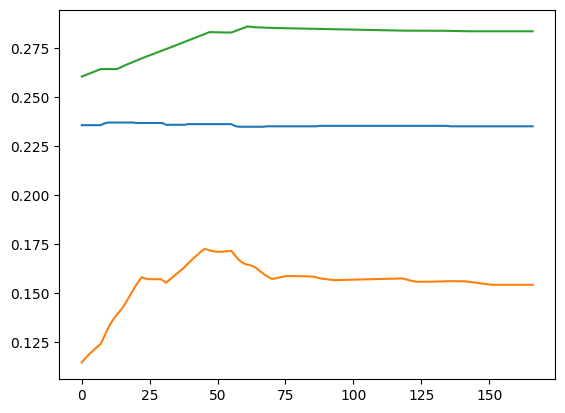

In [80]:
plt.plot(y)

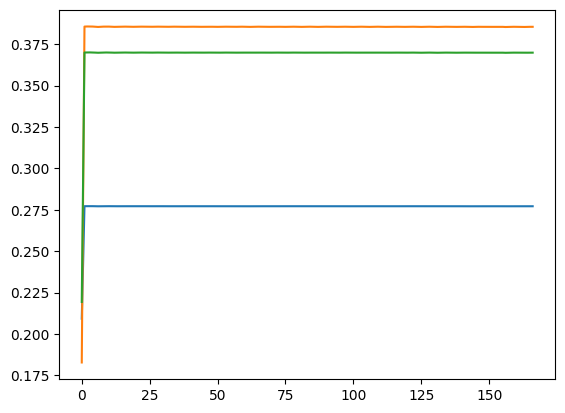

In [81]:
plt.plot(y_hat[0])